In [1]:
# 所有用到的包
import numpy as np
import cv2
import matplotlib.pyplot as plt

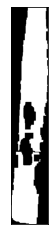

In [6]:

img = cv2.imread(
    '/Users/zhouxinyu/Code/Python/jupyter/assets/images/污染检测/污染/绝缘层污染 (21).tif', cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

binarized = binarizeWhite(hsv) # 原图二值化后的图像
preProcessed = preProcess(binarized) # 原图二值化图像预处理后的图像

cutted_img = np.transpose(cutVerticalBlack(np.transpose(
    cutVerticalBlack(np.transpose(preProcessed))
)))
showImages([cutted_img])


In [5]:
def binarizeWhite(hsvImage):
    lower=np.array([0,0,221])
    upper=np.array([180,80,255])
    mask = cv2.inRange(hsvImage, lower, upper)
    return mask

def preProcess(binarizedImg):
    # 开：先腐蚀，再膨胀
    # 作用：腐蚀 > 膨胀，会放大比较小的污染，让边缘平滑一些，减少一些毛边
    opening_kernel = np.ones((5,5), np.uint8)
    opening = cv2.morphologyEx(binarizedImg, cv2.MORPH_OPEN, opening_kernel)
    
    # 腐蚀，
    # 作用：去除掉右侧
    erosion_kernel = np.ones((5,5), np.uint8)
    erosion_opening = cv2.erode(opening, erosion_kernel, iterations = 3)
    
    # 闭操作：先膨胀，再腐蚀
    closing_kernel = np.ones((20,20), np.uint8)
    closing = cv2.morphologyEx(erosion_opening, cv2.MORPH_CLOSE, closing_kernel)
    return closing

def cutVerticalBlack(img):
    new_img = []
    for i in range(0, len(img)):
        sizes = int(sum(img[i]) / 255)
        if sizes > 20:
            new_img.append(img[i])
    return new_img

def showImages(images, titles = [''], size = [1, 1], BGR = False):
    for i in range(len(images)):
        plt.subplot(size[0], size[1], i + 1)
        showImage = images[i]
        if (BGR):
            b,g,r = cv2.split(images[i])
            showImage = cv2.merge([r,g,b])
        plt.imshow(showImage ,'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])